# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a widely used statistical technique for dimensionality reduction in datasets. This method identifies the directions in which the data exhibit the greatest variability and transforms the data into a new coordinate system based on these directions. PCA was developed by Karl Pearson in 1901 and later refined by Harold Hotelling in the 1930s.

PCA is an unsupervised method, meaning it relies solely on a set of features $X_1, X_2, \dots, X_M$ without considering any associated response variable $Y$. Although its primary use is for dimensionality reduction, it is also applied in supervised learning problems, for example, by using the principal components as predictors in machine learning algorithms instead of the larger original set of variables. Additionally, PCA is a powerful tool for data visualization.

PCA transforms the data into a new coordinate system where the principal components represent the greatest variability in the data. These components are sequences of unit vectors that optimally fit the data, minimizing the average squared perpendicular distance between the points and the line. The directions of the principal components correspond to those in the feature space along which the data show the greatest variability, defining lines and subspaces that closely approximate the data cloud.

One of the main advantages of PCA is its ability to summarize a large set of correlated variables into a smaller number of representative variables that, together, explain most of the variability of the original set. This is especially useful in contexts with a large number of variables, where visualizing the data becomes a challenge. For example, if you have $N$ observations and a set of $M$ features $X_1, X_2, \dots, X_M$, you could generate $\binom{M}{2} = \frac{M(M - 1)}{2}$ scatterplots to visualize the data. This means that for $M = 10$, there would be 45 possible scatterplots, which can become impractical if $M$ is large. Moreover, it's likely that none of these plots alone would be informative, as each captures only a fraction of the total information. Clearly, a more efficient method is needed to visualize the $N$ observations when $M$ is large, and this is where PCA is particularly useful.

PCA allows for finding a low-dimensional representation of the data that captures as much variation as possible. While each of the $N$ observations resides in an $M$-dimensional space, not all of these dimensions are equally relevant. PCA identifies a small number of dimensions that are the most interesting, where the degree of interest is measured by the amount of variation in the observations along each dimension. Each of these dimensions is a linear combination of the original $M$ features.

Therefore, PCA provides an effective solution for dimensionality reduction and data visualization in a low-dimensional space. For example, if two principal components can be derived that capture most of the variability in the data, the observations can be represented in a two-dimensional scatterplot, making it easier to identify patterns and clusters of related data.


## PCA Recipe

In what follows, we explain the procedure for finding the principal components. Before diving into the details, it's worth noting that in PCA, the variables should be centered so that they have a mean of zero. Additionally, the results obtained when performing PCA also depend on whether the variables have been individually scaled (i.e., each multiplied by a different constant).

What we seek is a mapping that transforms the original features $X_1, X_2, \dots, X_M$ into new features $Z_1, Z_2, \dots, Z_M$ in such a way that the variance is maximized, subject to the constraint that the column vectors forming the matrix representation of this transformation have unit norm. Mathematically, this means that the first principal component of the transformed feature set is the normalized linear combination of the features:

$$
Z_1 = \gamma_{11}X_1 + \gamma_{21}X_2 + \dots + \gamma_{M1}X_M = \sum_{j=1} \gamma_{j1}X_j = \boldsymbol{\gamma}_1^T \mathbf{X} =
\left( \gamma_{11}, \gamma_{21}, \dots, \gamma_{M1} \right)
\begin{bmatrix}
X_1 \\
X_2 \\
\vdots \\
X_M
\end{bmatrix}
$$

We refer to the elements $\gamma_{11}, \gamma_{21}, \dots, \gamma_{M1}$ as the loadings of the first principal component; collectively, the loadings form the principal component loading vector, $\boldsymbol{\gamma}_1 = (\gamma_{11}, \gamma_{21}, \dots, \gamma_{M1})^T$. We constrain the loadings so that their sum of squares equals one, as otherwise, making these elements arbitrarily large in absolute value could result in an arbitrarily large variance. Therefore, to obtain the first principal component, we need to find the linear combination of the feature values that has the highest sample variance subject to the constraint $\lVert \gamma_1 \rVert^2 = \sum_{j=1}^M \gamma_{j1}^2 = 1$. In other words, the first principal component loading vector solves the following constrained optimization problem:

$$
\max_{\gamma_{11}, \dots, \gamma_{M1}} \left\{ \text{Var}\left[ Z_1 \right] \right\}, \,\,\, \text{subject to} \,\,\, \lVert \boldsymbol{\gamma_1} \rVert^2 = 1
$$

For convenience, we write the variance of $Z_1$ in matrix form, which is the objective function:

$$
\text{Var}\left[ Z_1 \right] = \text{Var}\left[ \boldsymbol{\gamma}_1^T \mathbf{X} \right] = \boldsymbol{\gamma}_1^T \boldsymbol{\Sigma} \boldsymbol{\gamma}_1
$$

Thus, the problem takes the form:

$$
\max_{\gamma_{11}, \dots, \gamma_{M1}} \left\{ \boldsymbol{\gamma}_1^T \boldsymbol{\Sigma} \boldsymbol{\gamma}_1 \right\}, \,\,\, \text{subject to} \,\,\, \boldsymbol{\gamma}_1^T \boldsymbol{\gamma}_1 = 1
$$

A well-known method for solving constrained optimization problems is the method of Lagrange multipliers. For our problem, the Lagrangian is defined as the objective function minus a constant for each of the constraints:

$$
\mathcal{L}(\boldsymbol{\gamma}_1) = \boldsymbol{\gamma}_1^T\boldsymbol{\Sigma} \boldsymbol{\gamma}_1 - \lambda_1\left( \boldsymbol{\gamma}_1^T\boldsymbol{\gamma}_1 - 1 \right)
$$

To maximize the Lagrangian, we must find its critical points:

$$
\begin{split}
\frac{\partial \mathcal{L}}{\partial \boldsymbol{\gamma}_1}
& = \Sigma\boldsymbol{\gamma}_1 + \boldsymbol{\gamma}_1^T\Sigma - \lambda_1\boldsymbol{\gamma}_1 - \lambda_1\boldsymbol{\gamma}_1^T \\
& = \Sigma\boldsymbol{\gamma}_1 + \Sigma\boldsymbol{\gamma}_1 - \lambda_1\mathbb{1}\boldsymbol{\gamma}_1 - \lambda_1\mathbb{1}\boldsymbol{\gamma}_1^T \\
& = 2\Sigma\boldsymbol{\gamma}_1 - 2\lambda_1\mathbb{1}\boldsymbol{\gamma}_1 \\
& = 2\left(\Sigma- \lambda_1\mathbb{1}\right)\boldsymbol{\gamma}_1  \\
& = \boldsymbol{0} \\ \\
& \Rightarrow \left(\Sigma - \lambda_1\mathbb{1}\right)\boldsymbol{\gamma}_1 = \boldsymbol{0}
\end{split}
$$

By the Rouché–Frobenius theorem, for a homogeneous system of equations to have non-trivial solutions, the associated matrix must be singular, which means its determinant is zero: $\text{det}\left(\Sigma - \lambda_1\mathbb{1}\right) = 0$. This implies that $\lambda_1$ is an eigenvalue of the covariance matrix $\Sigma$. Additionally, we know that since the covariance matrix $\Sigma$ is $M \times M$ and positive definite, it has exactly $M$ eigenvalues $\lambda_i, \, i = 1, 2, \dots, M$ that satisfy $\lambda_1 > \lambda_2 > \cdots > \lambda_M$. Therefore, since the variance of the first principal component $Z_1$ is:

$$
\text{Var}\left[ Z_1 \right] = \text{Var}\left[ \boldsymbol{\gamma}_1^T \mathbf{X} \right] = \boldsymbol{\gamma}_1^T \boldsymbol{\Sigma} \boldsymbol{\gamma}_1 = \boldsymbol{\gamma}_1^T \lambda_1\mathbb{1} \boldsymbol{\gamma}_1 = \lambda_1\boldsymbol{\gamma}_1^T\boldsymbol{\gamma}_1 = \lambda_1\lVert \boldsymbol{\gamma_1} \rVert^2 = \lambda_1
$$

this means that the maximum variance of the first principal component corresponds to the largest eigenvalue of the covariance matrix $\lambda_1$, and the transformation vector $\boldsymbol{\gamma}_1$ corresponds to the eigenvector of the covariance matrix associated with this eigenvalue $\lambda_1$.

The second principal component is the linear combination of $X_1, \dots, X_M$ that has the maximum variance among all linear combinations that are uncorrelated with $Z_1$:

$$
Z_2 = \gamma_{12}X_1 + \gamma_{22}X_2 + \dots + \gamma_{M2}X_M = \sum_{j=1} \gamma_{j2}X_j = \boldsymbol{\gamma}_2^T \mathbf{X} =
\left( \gamma_{12}, \gamma_{22}, \dots, \gamma_{M2} \right)
\begin{bmatrix}
X_1 \\
X_2 \\
\vdots \\
X_M
\end{bmatrix}
$$

where $\boldsymbol{\gamma}_2$ is the loading vector for the second principal component, with elements $\gamma_{12}, \gamma_{22}, \dots, \gamma_{M2}$. Therefore, to find the second principal component, we repeat the process used to find the first component but add the constraint that the first and second principal components are uncorrelated, which is equivalent to saying that $\text{Cov}(Z_1, Z_2) = 0$. Since:

$$
\begin{split}
\text{Cov}(Z_1, Z_2)
& = \text{Cov}(\boldsymbol{\gamma}_2^T\mathbf{X}, \boldsymbol{\gamma}_1^T\mathbf{X}) \\
& = \text{Cov}(\boldsymbol{\gamma}_2^T\mathbf{X}, \mathbf{X}^T\boldsymbol{\gamma}_1) \\
& = \boldsymbol{\gamma}_2^T\text{Cov}(\mathbf{X}, \mathbf{X}^T)\boldsymbol{\gamma}_1 \\
& = \boldsymbol{\gamma}_2^T\mathbb{E}\left[ \left(\mathbf{X} - \boldsymbol{\mu}_X \right)\left(\mathbf{X} - \boldsymbol{\mu}_X \right)^T \right]\boldsymbol{\gamma}_1, \,\,\, \text{(using properties of the transpose)} \\
& = \boldsymbol{\gamma}_2^T \boldsymbol{\Sigma} \boldsymbol{\gamma}_1 \\
& = \boldsymbol{\gamma}_2^T \lambda_1\mathbb{1} \boldsymbol{\gamma}_1 \\
& \Rightarrow \boldsymbol{\gamma}_2^T \boldsymbol{\gamma}_1 = 0
\end{split}
$$

It follows that constraining $Z_2$ to be uncorrelated with $Z_1$ is equivalent to constraining the direction $\boldsymbol{\gamma}_2$ to be orthogonal (perpendicular) to the direction $\boldsymbol{\gamma}_{1}$. Therefore, finding the second principal component reduces to solving a constrained optimization problem with two conditions:

$$
\max_{\gamma_{12}, \dots, \gamma_{M2}} \left\{ \text{Var}\left[ Z_2 \right] \right\}, \,\,\, \text{sujeto a} \,\,\, \lVert \boldsymbol{\gamma_2} \rVert^2 = 1, \,\,\, \text{y} \,\,\, \boldsymbol{\gamma}_2^T\boldsymbol{\gamma}_1 = 0
$$

The Lagrangian for this case is:

$$
\mathcal{L}(\boldsymbol{\gamma}_2) = \boldsymbol{\gamma}_2^T\boldsymbol{\Sigma} \boldsymbol{\gamma}_2 - \lambda_2\left( \boldsymbol{\gamma}_2^T\boldsymbol{\gamma}_2- 1 \right) - \alpha\left( \boldsymbol{\gamma}_2^T \boldsymbol{\gamma}_1 \right)
$$

We seek the critical points of the Lagrangian:

$$
\begin{split}
\frac{\partial \mathcal{L}}{\partial \boldsymbol{\gamma}_2}
& = 2\Sigma\boldsymbol{\gamma}_2 - 2\lambda_2\boldsymbol{\gamma}_2 - \alpha\boldsymbol{\gamma}_1 \\
& = 2\boldsymbol{\gamma}_1^T\Sigma\boldsymbol{\gamma}_2 - 2\lambda_2\boldsymbol{\gamma}_1^T\boldsymbol{\gamma}_2 - \alpha\boldsymbol{\gamma}_1^T\boldsymbol{\gamma}_1 \\
& = 2\boldsymbol{\gamma}_1^T\Sigma\boldsymbol{\gamma}_2 - 2\lambda_2\left(\boldsymbol{\gamma}_2^T\boldsymbol{\gamma}_1\right)^T - \alpha\lVert \boldsymbol{\gamma_1} \rVert^2 \\
& = 2\boldsymbol{\gamma}_1^T\lambda_2\boldsymbol{\gamma}_2 - \alpha \mathbb{1} \,\,\, \text{(using the eigenvector equation of} \, \boldsymbol{\gamma}_1 \text{)}\\
& = - \alpha \mathbb{1} \\
& = \boldsymbol{0} \\ \\
& \Rightarrow \alpha = 0 \\ \\
& \Rightarrow \left(\Sigma - \lambda_2\mathbb{1}\right)\boldsymbol{\gamma}_2 = \boldsymbol{0}
\end{split}
$$

In this way we obtain another eigenvalue equation and the same strategy of choosing $\boldsymbol{\gamma}_2$ as the eigenvector associated with the second largest eigenvalue yields the second principal component.

To summarize the procedure, when performing PCA, the first principal component of a set of $M$ variables is the derived variable formed as a linear combination of the original variables that explains the most variance. The second principal component explains the most variance of what remains once the effect of the first component is removed, and we can proceed through $M$ iterations until all the variance is explained. The first principal component can be equivalently defined as a direction that maximizes the variance of the projected data and the $j$-th principal component can be taken as a direction orthogonal to the first $j-1$ principal components that maximize the variance of the projected data.

Finally, we can construct a matrix from the $\boldsymbol{\gamma}_j$ eigenvectors, namely:

$$
\boldsymbol{\Gamma} = \left( \boldsymbol{\gamma}_1, \boldsymbol{\gamma}_2, \dots, \boldsymbol{\gamma}_M \right) =
\begin{bmatrix}
\gamma_{11} & \gamma_{12} & \cdots & \gamma_{1M} \\
\gamma_{21} & \gamma_{22} & \cdots & \gamma_{2M} \\
\vdots      & \cdots      & \ddots & \vdots      \\
\gamma_{M1} & \gamma_{M2} & \cdots & \gamma_{MM} \\
\end{bmatrix}
$$

and since the $\boldsymbol{\gamma}_j$ are orthonormal to each other, the matrix $\boldsymbol{\Gamma}$ will be an orthogonal matrix, i.e. $\boldsymbol{\Gamma}^T\boldsymbol{\Gamma} = \mathbb{1}$ which can be understood as a rotation in the feature space, hence PCA reduces to finding a rotation of the coordinate system that maximizes the variance:

$$
\mathbf{Z} = \boldsymbol{\Gamma} \mathbf{X}
$$

The matrix $\boldsymbol{\Gamma}$ is precisely the matrix that allows to diagonalize the covariance matrix $\Sigma$ and whose diagonal elements will be the variances of the new features $\mathbf{Z}$. Mathematically, this can be expressed as follows:

$$
\Lambda = \text{Var}\left[ \mathbf{Z} \right] = \text{Var}\left[ \boldsymbol{\Gamma} \mathbf{X} \right] = \boldsymbol{\Gamma}^T\Sigma\boldsymbol{\Gamma} \Rightarrow \Sigma = \boldsymbol{\Gamma}\Lambda \boldsymbol{\Gamma}^T
$$

where $\Lambda$ takes the form:

$$
\Lambda =
\begin{bmatrix}
\lambda_1 & 0         & \cdots & 0         \\
0         & \lambda_2 & \cdots & 0         \\
\vdots    & \vdots    & \ddots & \vdots    \\
0         & 0         & \cdots & \lambda_M \\
\end{bmatrix}
, \,\,\, \text{donde} \,\,\, \lambda_i = \text{Var}\left[ Z_i \right]
$$

## The proportion of variance explained

When projecting data onto the first principal components, a natural question arises: how much information is lost in this process? In other words, how much of the data's variance is not explained by the first principal components? The proportion of variance explained (PVE) by each principal component gives us a clue about the amount of information retained.

The PVE is calculated as the variance explained by each principal component divided by the total variance of the data:

$$
\text{PVE}_j = \frac{\text{Var}(Z_j)}{\sum_{j=1}^M \text{Var}(X_j)} = \frac{\lambda_j}{\text{Tr}\left( \Sigma \right)} = \frac{\lambda_j}{\text{Tr}\left( \boldsymbol{\Gamma}\Lambda \boldsymbol{\Gamma}^T \right)} = \frac{\lambda_j}{\text{Tr}\left( \boldsymbol{\Gamma}^T\boldsymbol{\Gamma}\Lambda \right)} = \frac{\lambda_j}{\text{Tr}\left( \mathbb{1}\Lambda \right)} = \frac{\lambda_j}{\sum_{j=1}^M\lambda_j} > 0
$$

By summing the PVE of the first $q$ principal components, we obtain the cumulative PVE, which indicates the amount of variance explained by these components:

$$
\text{PVE} = \frac{\sum_{j=1}^q\lambda_j}{\sum_{j=1}^M\lambda_j}
$$

But how many principal components should we use? The answer is not unique and depends on the dataset and the application area. A common approach is to use a scree plot to determine the number of principal components needed to explain a significant amount of the variation in the data. We look for a point where the proportion of variance explained by each principal component decreases, known as the elbow in the scree plot.

However, this approach is subjective, and there is no objective way to decide how many principal components are sufficient. In practice, the first principal components are examined to find interesting patterns in the data, and this process continues until no more interesting patterns are found. PCA is generally used as a tool for exploratory data analysis, and this approach reflects its subjective nature.

## `Python` Implementation (without ML libraries)

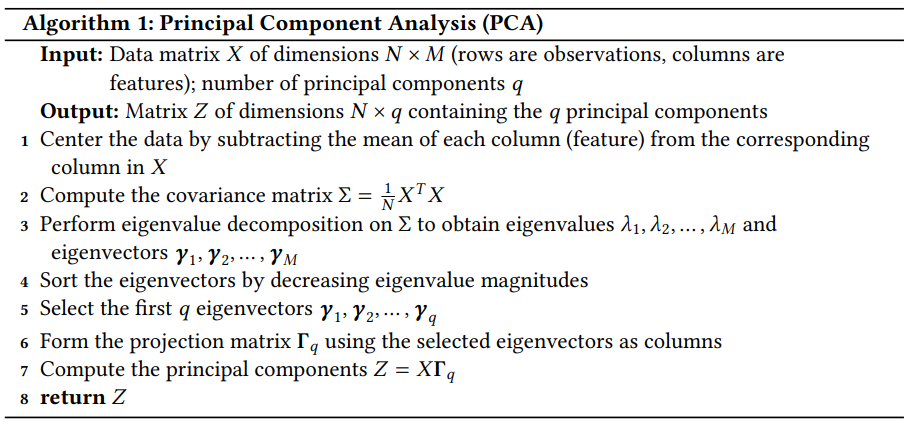

In [1]:
import numpy as np

def PCA(X, q):
    """
    Perform Principal Component Analysis (PCA) on the input data matrix X.

    Inputs:
        X (numpy.ndarray): The input data matrix of shape (N, M), 
        where N is the number of samples and M is the 
        number of features.
        q (int): The number of principal components to return.

    Returns:
        numpy.ndarray: A matrix Z of dimensions (N, q) 
        containing the q principal components.

    Author:
        Rodrigo J. Kang
    """
    # Step 1: Center the data by subtracting the mean of each column (feature)
    N, M = X.shape
    mean = np.mean(X, axis=0)
    X_centered = X - mean

    # Step 2: Compute the covariance matrix
    covariance_matrix = X_centered.T @ X_centered / N

    # Step 3: Perform eigenvalue decomposition on the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Step 4: Sort the eigenvectors by decreasing eigenvalue magnitudes
    sorted_indices = np.argsort(-eigenvalues)
    eigenvectors = eigenvectors[:, sorted_indices]
    eigenvalues = eigenvalues[sorted_indices]

    # Step 5: Select the first q eigenvectors
    gamma_q = eigenvectors[:, :q]

    # Step 6: Compute the principal components Z
    Z = X_centered @ gamma_q

    # Return the principal components matrix Z
    return Z

# ==============
# Implementation
# ==============

# Example usage
X = np.random.randn(100, 5)  # Generate random data (100 samples, 5 features)
q = 3  # Number of principal components to return

# Perform PCA and obtain the first q principal components
Z = PCA(X, q)

# Print the resulting matrix of principal components Z
print("Principal Components (Z):")
print("==========================\n")
print(Z)

Principal Components (Z):

[[ 6.93818490e-01 -1.34360450e-01  1.30866229e+00]
 [-1.83058095e+00 -1.13689967e+00  1.56840636e+00]
 [ 3.50579924e-01 -6.12710352e-01  9.60388633e-01]
 [ 4.96233734e-01 -1.48167544e+00 -5.77880160e-01]
 [-2.36956561e+00  4.28383378e-01 -3.02412053e-01]
 [ 7.26795426e-01 -2.55317482e-01 -3.86100552e-02]
 [ 9.34027468e-01  1.66113430e+00 -7.17341977e-02]
 [-6.48308503e-01 -3.74523577e-01 -1.73972911e-01]
 [ 1.71278659e+00  2.49243062e-01  2.04641966e-01]
 [-2.52534954e+00  2.57685768e+00  2.75395228e-01]
 [ 1.04589013e+00  1.56221544e+00  8.48820562e-01]
 [-1.65986887e+00  1.15000841e+00  6.97259135e-01]
 [ 2.50454195e-01 -9.42040360e-01  9.52308150e-01]
 [ 2.48603847e-01  5.12345571e-01 -1.58909531e+00]
 [-1.19077658e+00 -6.19798347e-01 -7.23656317e-02]
 [-8.21956954e-01  5.38933075e-01 -1.83195050e+00]
 [-6.16238221e-02 -1.38144773e+00 -1.50812262e+00]
 [-1.18995349e+00 -1.85220543e-01  9.59573159e-01]
 [-1.25056445e+00 -7.41961026e-01  2.00183513e-01]
 [ 4

## `Python` Implementation (with ML libraries)

In [2]:
from sklearn.decomposition import PCA
import numpy as np

# Data generation
X = np.random.randn(100, 5)

# Number of principal components to return
q = 3

# Initialize PCA model with the specified number of components
pca = PCA(n_components=q)

# Fit the model and transform the data to obtain the principal components
Z = pca.fit_transform(X)

# Print the resulting matrix of principal components Z
print("Principal Components (Z):")
print("==========================\n")
print(Z)

Principal Components (Z):

[[-1.53639348 -1.31781523 -0.10003274]
 [-0.09847863 -1.14016555 -0.34818161]
 [-0.66382133 -0.40909281 -0.861863  ]
 [-0.68147218  0.27140462 -1.29262518]
 [-0.81522523  0.47289142  0.53344052]
 [ 0.81080382 -0.52258858 -0.48719147]
 [-2.64170725  0.680734    0.68628769]
 [ 0.73370182  0.52536309 -0.15909531]
 [-1.39315593  0.75981622  2.11018657]
 [-0.1032695   0.85237771  2.36491803]
 [-0.91311286  1.12517643 -0.21405908]
 [-1.15312484  0.37994098  0.66475512]
 [ 1.44698172  1.00183846 -0.55900255]
 [-0.37813971 -0.55139836 -1.17918339]
 [-0.85761485  0.32951546 -0.51679096]
 [-2.47010953 -1.98254118 -0.86114427]
 [ 0.8656445   1.54214728 -2.45637247]
 [-0.33082777 -1.00741514 -0.51299585]
 [ 0.25401663  1.63539287 -0.56294118]
 [ 1.19404886 -0.88308701  0.1756566 ]
 [ 2.03285002  0.69498302 -0.91473477]
 [ 0.31964936 -0.55668976  0.34968893]
 [-0.06296429  0.24028459  0.58172384]
 [ 1.51745519 -1.28695351 -0.1010292 ]
 [-2.42954145  0.73791572 -0.83779947